In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# First Glance

In [2]:
df = pd.read_csv('C:/Users/saram/OneDrive/Desktop/ML_extract/ML/train.csv')
df_test = pd.read_csv('C:/Users/saram/OneDrive/Desktop/ML_extract/ML/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

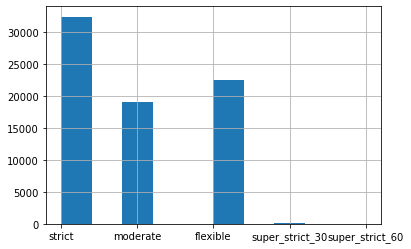

In [4]:
df.cancellation_policy.hist()

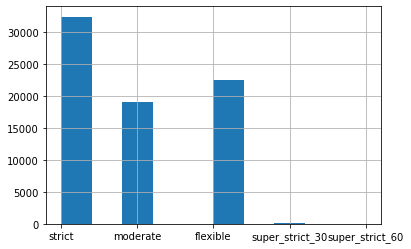

In [5]:
df_test['cancellation_policy'].hist()

# Training Set

In [6]:
train = df[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]
train.head()

,cancellation_policy,accommodates,number_of_reviews,room_type,city,cleaning_fee
0,strict,3,2,Entire home/apt,NYC,True
1,strict,7,6,Entire home/apt,NYC,True
2,moderate,5,10,Entire home/apt,NYC,True
3,flexible,4,0,Entire home/apt,SF,True
4,moderate,2,4,Entire home/apt,DC,True


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cancellation_policy  74111 non-null  object
 1   accommodates         74111 non-null  int64 
 2   number_of_reviews    74111 non-null  int64 
 3   room_type            74111 non-null  object
 4   city                 74111 non-null  object
 5   cleaning_fee         74111 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 2.9+ MB


In [8]:
change = []
for i in train.cancellation_policy: 
    if i == 'super_strict_60':
        a = 'strict'
    if i == 'super_strict_30':
        a = 'strict'
    if i == 'long_term':
        a = 'strict'
    if i == 'flexible':
        a = 'flexible'
    if i == 'moderate':
        a = 'moderate'
    if i == 'strict':
        a = 'strict'
    change.append(a)

 
train['cancellation_policy'] = change

<ipython-input-8-66d542c26f80>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cancellation_policy'] = change


In [9]:
list3 = []
for key in train.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list3.append(f)
train['cleaning_fee'] = list3

<ipython-input-9-b619e6dc91e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cleaning_fee'] = list3


In [10]:
train = pd.get_dummies(train,columns=['room_type','city'])

In [11]:
X_train = train.drop(columns = ['cancellation_policy'])
y_train = train['cancellation_policy']

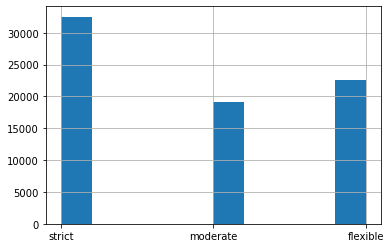

In [12]:
y_train.hist()

# Testing Set

In [13]:
test = df_test[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]

In [14]:
change_test = []
for i in test['cancellation_policy']: 
    if i == 'super_strict_60':
        k = 'strict'
    if i == 'super_strict_30':
        k = 'strict'
    if i == 'long_term':
        k = 'strict'
    if i == 'strict':
        k = 'strict'
    if i == 'moderate':
        k = 'moderate'
    if i == 'flexible':
        k = 'flexible'
    change_test.append(k)
test['cancellation_policy'] = change_test

<ipython-input-14-8e30c9cf9ed0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cancellation_policy'] = change_test


In [15]:
X_test = test[['accommodates','number_of_reviews','room_type','city','cleaning_fee']]
y_test = test['cancellation_policy']

In [16]:
list4 = []
for key in X_test.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list4.append(f)
X_test['cleaning_fee'] = list4

<ipython-input-16-0849fe6e22dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cleaning_fee'] = list4


In [17]:
X_test = pd.get_dummies(X_test,columns=['room_type','city'])

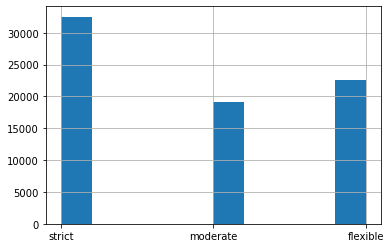

In [18]:
y_test.hist()

# Training and Testing

In [19]:
clf = svm.SVC()

In [20]:
clf.fit(X_train,y_train)

SVC()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    flexible       0.62      0.48      0.54     22545
    moderate       0.86      0.00      0.00     19063
      strict       0.51      0.89      0.65     32503

    accuracy                           0.54     74111
   macro avg       0.66      0.46      0.40     74111
weighted avg       0.63      0.54      0.45     74111



### Optimization using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.533, total=13.4min
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.4min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.528, total=13.5min
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.9min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.534, total=15.0min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.523, total=14.8min
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.529, total=15.2min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.533, total=13.6min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.528, total=11.2min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.534, total= 7.8min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.523, total= 8.6min
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .